# Lecture 6: Scientific Python Ecosystem
## October 22, 2019
## Tristan Glatard


# Today's objectives 
1. Create data models with `numpy`, consolidate our knowledge of `matplotlib` and `pip`.
2. Load and query data the easy way with `pandas`

# Data models

In this class, a data model is a way to summarize a (large) dataset using a mathematical formulation or a program.

For instance, a line might be a good data model:

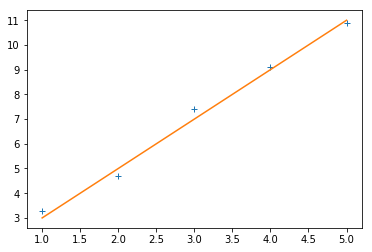

In [14]:
from matplotlib import pyplot as plt
from numpy import array
x = array([1, 2, 3, 4, 5])
y = array([ 3.3, 4.7, 7.4, 9.1, 10.9])
plt.plot(x, y, '+')
plt.plot(x, 1+2*x)
plt.show()

Or a very bad one:

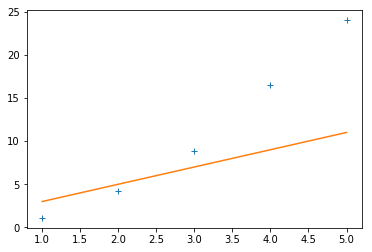

In [15]:
x = array([1, 2, 3, 4, 5])
y = array([ 1.1, 4.2, 8.8, 16.5, 24])
plt.plot(x, y, '+')
plt.plot(x, 1+2*x)
plt.show()

In this particular case, a polynomial of degree 2 is a better fit:

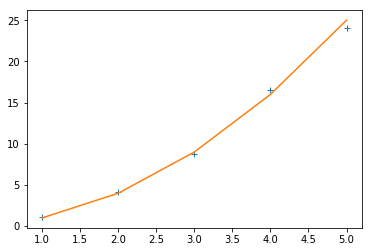

In [16]:
x = array([1, 2, 3, 4, 5])
y = array([ 1.1, 4.2, 8.8, 16.5, 24])
plt.plot(x, y, '+')
plt.plot(x, x**2)
plt.show()

Numpy's `polyfit` function can find the "best" polynomial fit for a dataset:

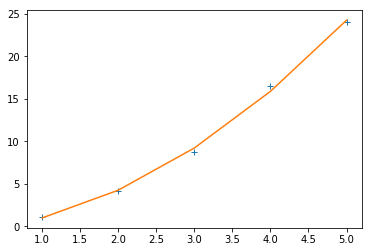

In [17]:
from matplotlib import pyplot as plt
from numpy import polyfit, polyval

# This finds the best polynomial that passes through x and y
polynomial = polyfit(x, y, 2)

plt.plot(x, y, '+')
# Polyval evaluates the polynomial, i.e., computes y such as y = P(x)
plt.plot(x, polyval(polynomial, x), '-')
plt.show()

# Activity 1: polynomial models with numpy

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Antu_task-complete.svg/1024px-Antu_task-complete.svg.png" width=50 align=left/>

* Using `numpy`, import one patient of the arthritis dataset used in the previous lectures
* Fit a line to this patient's data: does a line properly describe the number of inflammations for this patient?
* Increase the degree of the polynomial model until you are satisfied with the result.

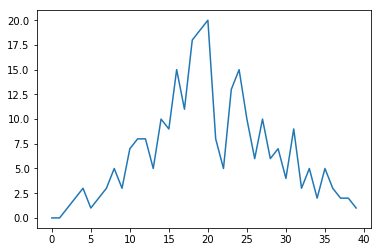

In [18]:

import numpy
a = numpy.loadtxt(fname='../arthritis/data/inflammation-01.csv', delimiter=',')

from matplotlib import pyplot as plt
patient = a[7]
plt.plot(patient)
plt.show()

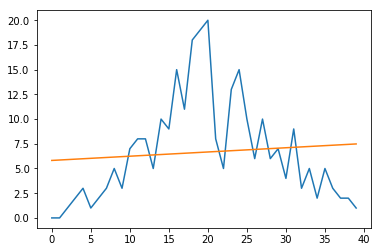

In [19]:
from numpy import arange
x = arange(len(patient))
line = polyfit(x, patient, 1)
plt.plot(patient)
plt.plot(x, polyval(line, x))
plt.show()

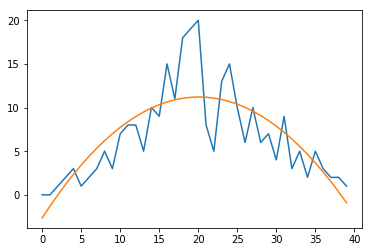

In [20]:
from numpy import arange
poly = polyfit(x, patient, 3)
plt.plot(patient)
plt.plot(x, polyval(poly, x))
plt.show()

# Loading data with pandas

Pandas is a major data manipulation library in Python. To begin, let's install it using `pip`:

In [21]:
pip install pandas

You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


There are 2 important data types in Pandas:
    1. `Series`, describing 1D data
    2. `DataFrame`, describing 2D data

`Series` are similar to lists:

In [22]:
import pandas as pd
s = pd.Series([1, 3, 5, 10, 6, 8])
print(s)

0     1
1     3
2     5
3    10
4     6
5     8
dtype: int64


While `DataFrames` are similar to tables:

In [23]:
d = pd.DataFrame({'A': 1.,
                  'B': arange(4),
                  'C': ["zero", "one", "two", "three"]
                 })
print(d)

     A  B      C
0  1.0  0   zero
1  1.0  1    one
2  1.0  2    two
3  1.0  3  three


DataFrames are very useful to load tabular data, such as our AirBnb dataset:

In [27]:
df = pd.read_csv("airbnb/complete.csv")
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


# Activity 2: data exploration with pandas

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Antu_task-complete.svg/1024px-Antu_task-complete.svg.png" width=50 align=left/>

* Import the (full) AirBnb dataset as a Pandas dataframe
* Try the following functions and check what they do: 
    * `df.head()`
    * `df.describe()`
    * `df["price"]`
    * `df[3]`
    * `df.sort_values(by='price')`
    * `df[df.price > 100]`
    * `(df["price"] > 100) & (df["price"] < 150)`
    * `df.query("price > 100 and price < 150")`
    

In [12]:
df.query("price > 100 and price < 150")

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,2018-10-31,0.22,1,0
15,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,2019-06-29,1.20,1,46
17,7322,Chelsea Perfect,18946,Doti,Manhattan,Chelsea,40.74192,-73.99501,Private room,140,1,260,2019-07-01,2.12,1,12
21,8024,CBG CtyBGd HelpsHaiti rm#1:1-4,22486,Lisel,Brooklyn,Park Slope,40.68069,-73.97706,Private room,130,2,130,2019-07-01,1.09,6,347
23,8110,CBG Helps Haiti Rm #2,22486,Lisel,Brooklyn,Park Slope,40.68001,-73.97865,Private room,110,2,71,2019-07-02,0.61,6,304
24,8490,"MAISON DES SIRENES1,bohemian apartment",25183,Nathalie,Brooklyn,Bedford-Stuyvesant,40.68371,-73.94028,Entire home/apt,120,2,88,2019-06-19,0.73,2,233
41,12299,Beautiful Sunny Park Slope Brooklyn,47610,Abdul,Brooklyn,South Slope,40.66278,-73.97966,Entire home/apt,120,3,15,2019-05-27,0.39,1,345
42,12303,1bdr w private bath. in lofty apt,47618,Yolande,Brooklyn,Fort Greene,40.69673,-73.97584,Private room,120,7,25,2018-09-30,0.23,1,311


# Activity 3 (bonus): modeling AirBnb prices

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Antu_task-complete.svg/1024px-Antu_task-complete.svg.png" width=50 align=left/>

Our question is the following: "is the price of a listing increasing with the number of reviews it received?"

* Plot the price of all listings as a function of the number of reviews they received. Make a few observations on the plot.
* Fit a linear model to describe the evolution of listing price as a function of the number of reviews. Does the model properly describe the data? How would you improve it?
    

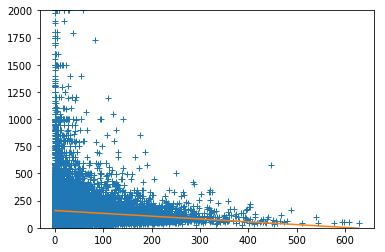

In [28]:
prices = df["price"]
reviews = df["number_of_reviews"]
p = polyfit(reviews, prices, 1)
plt.plot(reviews, prices, '+')
plt.plot(sorted(reviews), polyval(p, sorted(reviews)))
plt.ylim(0, 2000)
plt.show()